In [2]:
import numpy as np
from scipy import signal
import math
from wonambi import Dataset
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft
import pandas as pd
import scipy
import sys
sys.path.append('..')
from neursa import preprocessing


def AdaptBP_weight(X, f0, beta, delta, mu, fe, Aff):
    f0 = f0 / fe
    N = X.shape[0]
    nsig = 1
    weights = np.zeros((N, nsig))
    Y = X
    alpha = np.ones(N + 1) * np.cos(2 * np.pi * f0)
    b = 0.5 * (1 - beta) * np.array([1, 0, -1])
    a = np.array([1, -alpha[1] * (beta + 1), beta])
    V = signal.lfilter(b, a, Y)
    Q = np.mean(V[2:99]*(V[1:98] + V[3:100]))
    P = np.mean(V[1:100]**2)
    J = V[3:100]-2 * alpha[1] * V[2:99]+V[1: 98]
    J = np.mean(J * J)
    S = np.mean((X[1:100])** 2)
    W = S / J
    weights[1, :] = W / np.sum(W)
    weights[2, :] = W / np.sum(W)
    for n in np.arange(3, N):
        Y[n] = alpha[n] * (beta + 1) * Y[n - 1] - beta * Y[n - 2] + 0.5 * (1 - beta) * (X[n] - X[n - 2])
        Q = delta * Q + (1 - delta) * (Y[n - 1] * (Y[n] + Y[n - 2]))
        P = delta * P + (1 - delta) * Y[n - 1] * Y[n - 1]
        J = mu * J + (1 - mu) * (Y[n] - 2 * alpha[n] * Y[n - 1]+Y[n - 2])** 2
        S = mu * S + (1 - mu) * X[n]** 2
        W = S / J
        weights[n, :] = W / np.sum(W)
        alpha[n + 1] = 0.5 * weights[n,:]*(Q / P)
    k = alpha.shape[0]
    alpha = alpha[1: k-1]
    alpha = alpha * (abs(alpha) < 1) + 1.0 * (alpha >= 1) - 1.0 * (alpha <= -1)
    IF = fe * np.real(np.arccos(alpha)) / 2 / np.pi
    return IF





In [ ]:
def prepare_experiment(path_to_recording, info):
#     info = preprocessing.parse_table_info()
    paths = glob(f'{path_to_recording}/*')
    index = path_to_recording.split('Recording')[-1]
    date = info.loc[index, 'date']
    for i in paths:
        if i.find('.edf') != -1:
            data = Dataset(i)
            headers = data.header['chan_name']
            data = data.read_data()
            time_sensors = preprocessing.get_time_sensors(data)
            sensors = zip(data[0]
            
        elif (i.find('scores') != -1) and (i.find('csv')):
            labels = preprocessing.get_labels(i)
            time_labels = preprocessing.get_time_for_labels(i, date)


            


In [3]:
d = Dataset('/Users/anastasiafilippova/Downloads/Recording721002/Courbes 002.edf')
path = '/Users/anastasiafilippova/Downloads/Recording721002/Courbes_scores_002.csv'
index = 721002

FileNotFoundError: [Errno 2] No such file or directory: '/Users/anastasiafilippova/Downloads/Recording721001/Courbes 002.edf'

In [3]:
data = d.read_data()

In [4]:
labels = preprocessing.get_labels(path)
info = preprocessing.parse_table_info()

In [5]:
window_size = int(256*30)
start = 1000

In [6]:
y = data.data[0][23, start:window_size+start]

In [15]:
def remove_trend(signal, a=1, cutoff=0.3, fs=256, numcoef=1025, pass_zero=False):
    b = scipy.signal.firwin(numcoef, cutoff, fs=fs, pass_zero=pass_zero)
    cleared_signal = scipy.signal.filtfilt(b, a, signal)
    return cleared_signal

def min_max_scaler(X):
    
    X_std = (X - np.min(X)) / (np.max(X) - np.min(X))
    
    return X_std

def get_rr_interval(peaks):
    rr_intervals = np.diff(peaks)

    return rr_intervals

def get_ecg_features(ecg_window):
    
    without_trend = remove_trend(ecg_window)
    scaled_z = min_max_scaler(without_trend)
    peaks = scipy.signal.find_peaks(scaled_z, distance = int(0.5*256))
    rr_intervals = get_rr_interval(peaks[0])
    
    logs = np.zeros(ecg_window.shape[0])
    logs[peaks[0]] = 1
    
    
    return {'rri': rr_intervals, 'average_rri': np.mean(rr_intervals),
            'number_of_beats': np.sum(logs), 
            'beats': logs, 'peaks': peaks}

In [16]:
ecg = data.data[0][23, 1000:1000+window_size]

result = get_ecg_features(ecg)

In [17]:
result

{'rri': array([168, 164, 168, 165, 169, 167, 170, 169, 164, 168, 165, 164, 164,
        168, 165, 168, 170, 169, 168, 165, 167, 160, 164, 169, 169, 169,
        173, 170, 168, 165, 168, 165, 169, 164, 168, 165, 168, 168, 165,
        169, 169, 168, 169, 165, 169]),
 'average_rri': 167.13333333333333,
 'number_of_beats': 46.0,
 'beats': array([0., 0., 0., ..., 0., 0., 0.]),
 'peaks': (array([  45,  213,  377,  545,  710,  879, 1046, 1216, 1385, 1549, 1717,
         1882, 2046, 2210, 2378, 2543, 2711, 2881, 3050, 3218, 3383, 3550,
         3710, 3874, 4043, 4212, 4381, 4554, 4724, 4892, 5057, 5225, 5390,
         5559, 5723, 5891, 6056, 6224, 6392, 6557, 6726, 6895, 7063, 7232,
         7397, 7566]),
  {})}

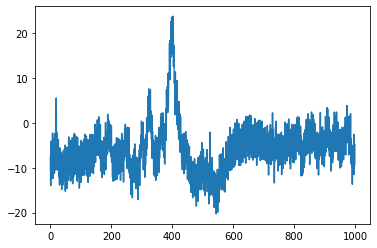

In [28]:
y = data.data[0][13, 4000:5000]
plt.plot(y)

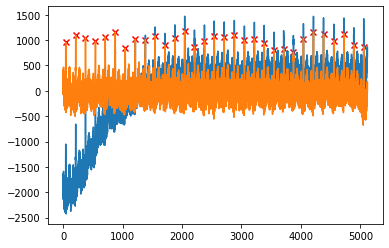

In [229]:

plt.plot(z)
# plt.plot(without_trend)
plt.plot(without_trend)
plt.scatter(peaks[0], without_trend[peaks[0]], marker='x', color = 'red')
plt.show()